# 1. Introdução

Neste post, vou falar um pouco com implementar/prototipar sua rede neural com o framework Keras, e não falar da parte teórica, isso pode ser assunto para um próximo post. Antes de começar, uma breve introdução.

Keras é um framework que permite a implementação de uma rede neural, de maneira rápida. Para exemplificar existem algumas maneiras de implementar uma, como por exemplo:

- Implementar voce mesmo a matemática (grafos computacionais, otimizações, etc)
- Utilizar alguma biblioteca, com por exemplo, tensorflow

A primeira opção é boa para quem esta aprendendo, mas para quem pretende colocar o projeto em produção, não seria uma boa escolha por alguns motivos, por exemplo já existem projetos prontos como tensorflow e keras =). A segunda é uma escolha viável, porém, em algmas situações, queremos fazer alguns testes, rápidos, que não demandem um controle tão "profundo" do que ocorre debaixo do panos.

Ai entra o Keras, ele é um framework que permite uma prototipação de maneira simples, em uma tradução livre da documentação:"feita para seres humanos, e não maquinas".

# 2. Instalando e importando

Keras roda em cima de backends, hoje existem implementações para Tensorflow, CNTK ou Theano, neste post, vou usar o Tensorflow.

A maneira mais fácil instalar via pip.

<pre>pip install tensorflow keras</pre>

Para importar e ver se funcionou, veja o código abaixo

In [6]:
import tensorflow
import keras

Ele exibe uma mensagem falando que estamos utilizando o backend Tensorflow.

Obs: Se quiser saber mais sobre Tensorflow, mande um email, posso escrever um outro post, ou veja a própria documentação, é um ótimo ponto de partida.

# 3. Dados

Para fins didádicos, vou usar o famoso dataset MNIST, análogo ao Hello World para quem aprende alguma linguagem de programação nova.

Para quem não conhece, o dataset é formado para imagems de 28x28 pixels, contendo digitos escritos a mão por pessoas e seus respectivos labels, digitos de 0 ao 9.

Então vamos carregar o dataset

In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ao executar o código acima, ele irá fazer o download dos dados,
e devolve os dados como duas tuples do python, a primeira contém
os dados para treinamento, e a segunda os dados para teste.

## 3.1. Sucinta exploração dos dados

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Dos resultados acimas, vamos que existem 60000 imagens para treino e 10000 para teste.

Podemos visualizar algumas imagens para entender melhor, da seguinte maneira:

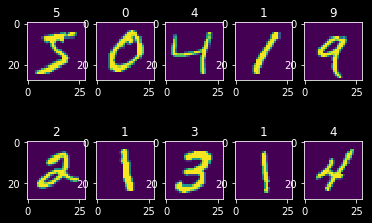

In [9]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    imagem_pixels = x_train[i]
    imagem_label = y_train[i]

    plt.title(imagem_label)
    plt.imshow(imagem_pixels)

plt.show()

Dai vemos algumas imagens e suas classificações.

# 4. Implementação

Até aqui nada de Keras, somente carregamento e alguma visualização dos dados (onde normalmente se gasta mais tempo em qualquer projeto que envolva machine learning), mas agora que temos os dados prontos podemos pensar em uma rede neural básica para implementar.

Vou utilizar uma versão simplificada da exibida nos videos de 
[Redes neurais do 3Blue1Brow](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1) (que são ótimos por sinal)

O Keras, trabalhar em cima de modelos (models). Modelos são maneiras de especificar regras gerais que seu modelo irá seguir. E também possui alguns metodos uteis na hora de debugar sua rede, veja [modelos keras](https://keras.io/models/about-keras-models/)

A mais comum, é a Sequencial (Sequential), onde a informação no momento do treinamento/uso é passada para frente (feedforward), e na hora da otimização é passando de traz para frente (backpropagation), ambas de maneira sequencia (ver imagem abaixo):

<img src="https://www.researchgate.net/profile/Montalee_Sasananan/publication/281271367/figure/fig2/AS:284441772609536@1444827611106/Feed-Forward-Neural-Network-with-Back-Propagation.png">

Ao criarmos um modelo, adicionamos as camadas (layers). O keras vem com algumas (muitas) já implementadas, então temos camadas recorrente (recurrent layers), camadas de convolução (convolution layers), camadas densas (dense layers), entre outras, encontre mais na [seção de camadas da documentação](https://keras.io/layers/core/).

## 4.1. Arquitetura da rede

A rede aqui implementada, terá uma camada de input com 28x28=784 neurônios (número de pixels), uma camada de 256 com um Dropout de 0.2, e a camada de saída, contendo 10 neurônios (número de classes do dataset).

Lembrando, que a quantidade de neurônios usadas é um hiperparametro, o que significa que não existe um número certo ou errado, existe aquele que se adequa ao seu problema, em geral encontra o ideal por meio de experimentos e de experiências passadas.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

modelo = Sequential()
modelo.add( Flatten(input_shape=(28, 28)) )
modelo.add( Dense(256, activation="relu") )
modelo.add( Dropout(0.2) )
modelo.add( Dense(10, activation="softmax") )

W1115 17:52:57.935631 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1115 17:52:57.984382 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1115 17:52:58.041721 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1115 17:52:58.144870 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1

Então, acima temos a criaçao do esqueleto do modelo. Adicionamos, a camada de input, que é do tipo Flatten, o que significa que a entrada é uma matriz de 28x28 e o seu output é um vetor de dimensão 728. Que está totalmenta conectada (fully connected) coma a próxima camada, que por sinal são densas (Dense), ou seja, os 728 neurônios estão conectados com os 256, que por sua vez estão conetados com os 10 de saída.

Ah, vemos o paramêtro activation. Ele é a função de ativação do neurônio, em poucas palavras, seu papel é pegar um número real, e mapea-lo no intervalo \[0, 1\] com certas propriedas, para mais informações [funções de ativação](https://en.wikipedia.org/wiki/Activation_function).

## 4.2. Compilação

Agora que temos o esquelo pronto, podemos compilar o modelo. Nesse momento, passamos as funções de otimização, a função de perda, quais metricas queremos obter durante o trinamento, entre outros, veja [seção de compilação da documentação](https://keras.io/models/model/#methods)

In [11]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

W1115 17:52:58.343204 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1115 17:52:58.474554 4651988416 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



Acima compilamos, e adicionamos a [função adam](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c) de otimizador, e a [função de entropia categorica cruzada esparsa](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718) (tradução livre) e por fim, queremos que nosso modelo retorne as métrica de [acurácia](https://en.wikipedia.org/wiki/Accuracy_and_precision) durante o tempo.

Muito disso, é bem teórico, e esta fora do escopo desse post, mas como mencioado, posso escrever outro post, explicando cada uma dessas coisas, mande email para cavernadedados@gmail.com

## 4.3. Treino

Por fim, temos o modelo, compilamos e agora podemos treina-lo. Isso tambem é bem prático com Keras, com algumas poucas linhas, já podemos ver alguns resultados.

In [12]:
x_treino_preprocessado = x_train / 255.0
epochs = 5

historico = modelo.fit(
    x_treino_preprocessado, y_train,
    epochs = epochs,
    validation_split = 0.2
)

W1115 17:52:59.184689 4651988416 deprecation.py:323] From /usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 233us/step - loss: 0.2787 - acc: 0.9179 - val_loss: 0.1377 - val_acc: 0.9595
Epoch 2/5
48000/48000 [==============================] - 9s 197us/step - loss: 0.1223 - acc: 0.9636 - val_loss: 0.0982 - val_acc: 0.9684
Epoch 3/5
48000/48000 [==============================] - 10s 217us/step - loss: 0.0892 - acc: 0.9729 - val_loss: 0.0884 - val_acc: 0.9712
Epoch 4/5
48000/48000 [==============================] - 9s 198us/step - loss: 0.0693 - acc: 0.9784 - val_loss: 0.0807 - val_acc: 0.9741
Epoch 5/5
48000/48000 [===

Aqui conseguimos uma acurácia acima dos 90%, o que provavelmente não esta nada mal, mas temos de nos certificar se a rede não overfitada, ou se ocorreu algo extranho, mas essa verificação deixo a cargo do leitor. 

Mas por agora, temos a variável historico, que recebe alguns dados sobre o processo de treinameto da rede, vamos dar uma analisada nele:

In [13]:
historico.history

{'val_loss': [0.13771939262809854,
  0.09824527770808587,
  0.0884157810860003,
  0.08071694571136807,
  0.07796251652180217],
 'val_acc': [0.9595,
  0.9684166666666667,
  0.9711666666666666,
  0.9740833333333333,
  0.9770833333333333],
 'loss': [0.27868012399971487,
  0.1223211902693535,
  0.08924282693994852,
  0.06931697330484167,
  0.057007857930885315],
 'acc': [0.917875,
  0.9636041666666667,
  0.9729166666666667,
  0.9783958333333334,
  0.982]}

Então vamos, que temos, a acc e val_acc, que é a acurácia no dataset de treino e o de validação (provineintes do split), respectivamente, durante as épocas. Podemos plotar e ver como se comporta:

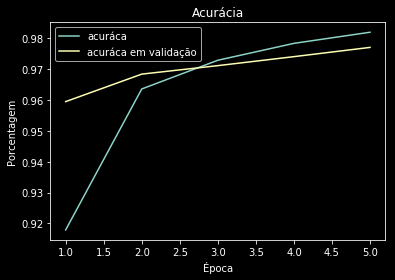

In [14]:
plt.title("Acurácia")
plt.plot(range(1, epochs+1), historico.history["acc"], label="acuráca")
plt.plot(range(1, epochs+1 ), historico.history["val_acc"], label="acuráca em validação")
plt.xlabel("Época")
plt.ylabel("Porcentagem")
plt.legend()
plt.show()

Podemos fazer o mesmo para a perda, da seguinte maneira:

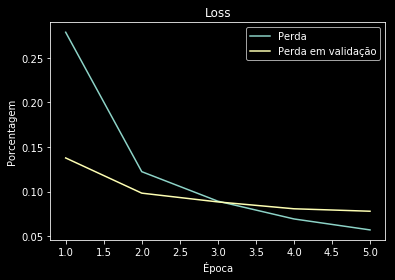

In [15]:
plt.title("Loss")
plt.plot(range(1, epochs+1), historico.history["loss"], label="Perda")
plt.plot(range(1, epochs+1 ), historico.history["val_loss"], label="Perda em validação")
plt.xlabel("Época")
plt.ylabel("Porcentagem")
plt.legend()
plt.show()

## 4.4. Avaliação e uso

Enfim, temos a rede treinada, agora nos falta avaliar em dados nunca vistos e ver como fazemos predições.


Para avaliar a rede, podemos usar o próprio método do keras, veja:

In [16]:
(perda_teste, acuracia_teste) = modelo.evaluate(x_test / 255.0, y_test)

print("Perda do teste:", perda_teste)
print("Acurácia do teste:", acuracia_teste)

10000/10000 [==============================] - 1s 89us/step
Perda do teste: 0.07362438447030727
Acurácia do teste: 0.9775


E para fazer uma predição, usamos o metodo predict (muito similar a API do scikitlearn):

In [17]:
import numpy as np

index = 3000
predicoes = modelo.predict( np.array([x_test[index] / 255.0]) )
print("Predição:", np.argmax(predicoes[0]))
print("Real:", y_test[index])

Predição: 6
Real: 6


# Conclusão

Criamos um modelos que reconhece digitos de uma imagem, que uma acurácia acima de 90% com poucas linhas de código, esse é o principal ganho quando se usa Keras, ele permiter uma prototipação rápida, pois como mencionado na sua [home](https://keras.io/), "Being able to go from idea to result with the least possible delay is key to doing good research." (ser capaz de partir de uma ideia até um resultado no menor tempo possível é a chave para uma pesquisa \[tradução livre\])

Então da próxima vez que precisar implementar uma rede neural, talvez vc possa colocar o Keras na sua caixa de ferramentas possiveis para resolver seu problema.

# Referências

- https://keras.io/
- http://neuralnetworksanddeeplearning.com/chap1.html
- https://www.alura.com.br/curso-online-deep-learning-introducao-com-keras
- https://www.3blue1brown.com/neural-networks